In [158]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [159]:
x = pd.read_csv("/home/slagov/Documents/ml-labs/a/ML1.2 multivariate/data/0_x.csv", header=None)
y = pd.read_csv("/home/slagov/Documents/ml-labs/a/ML1.2 multivariate/data/0_y.csv", header=None)
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [160]:
# строки, столбцы
print(x.shape)
print(y.shape)

(387, 5)
(387, 1)


In [161]:
def binary_regression(feature_number):
    binary = LinearRegression()
    print("Коэффициент до обучения [[0]]")

    start_time = time.time()
    binary.fit(x[[feature_number]], y)
    end_time = time.time()

    print(f"Коэффициент после обучения {binary.coef_}")
    plt.scatter(x[feature_number], y)
    xx = np.linspace(x[feature_number].min(), x[feature_number].max(), 100).reshape((-1, 1))
    plt.plot(xx, binary.predict(xx), c='r')
    title = f"Парная регрессия признака {feature_number} и целевой переменной"
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.show()
    score = binary.score(x[[feature_number]], y)
    print(f"Точность: {score}")
    mse_score = (-cross_val_score(binary, x[[feature_number]], y, cv=5, scoring='neg_mean_squared_error')).mean()
    print("Средняя ошибка на кросс-валидации (MSE):", mse_score)

    return title, score, mse_score, end_time - start_time

def multiple_regression():
    multiple = LinearRegression()
    print(f"До обучения {[np.zeros(5)]}")

    start_time = time.time()
    multiple.fit(x, y)
    end_time = time.time()

    print(f"После обучения {multiple.coef_}")
    yy = multiple.predict(x)
    plt.scatter(yy, y)
    plt.plot(yy, yy, c='r')
    title = "Множественная регрессия"
    plt.title(title)
    plt.xlabel("Y")
    plt.ylabel("Y (истинные)")
    plt.legend(["Предсказанное значение", "y=y"])
    plt.grid()
    score = multiple.score(x, y)
    print(f"Точность {score}")
    mse_score = (-cross_val_score(multiple, x, y, cv=5, scoring='neg_mean_squared_error')).mean()
    print("Средняя ошибка на кросс-валидации (MSE):", mse_score)

    return title, score, mse_score, end_time - start_time

In [162]:
# 1. Сравните коэффициенты парной и множественной регрессии до и после обучения. 
methods_stats = []
# 2. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

Коэффициент до обучения [[0]]
Коэффициент после обучения [[22.78111342]]


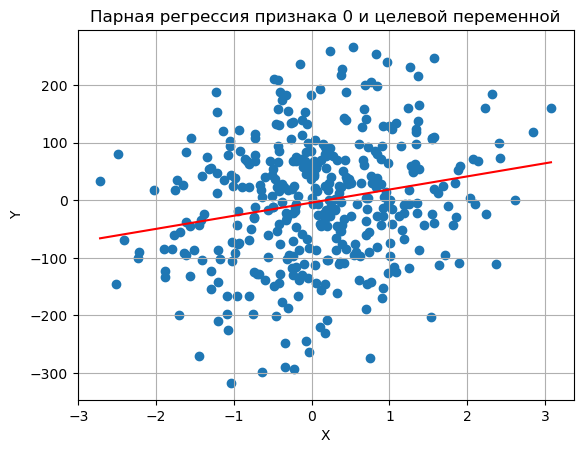

Точность: 0.04364336234689348
Средняя ошибка на кросс-валидации (MSE): 11655.186642974926


In [163]:
methods_stats.append(binary_regression(0))

Коэффициент до обучения [[0]]
Коэффициент после обучения [[95.52010745]]


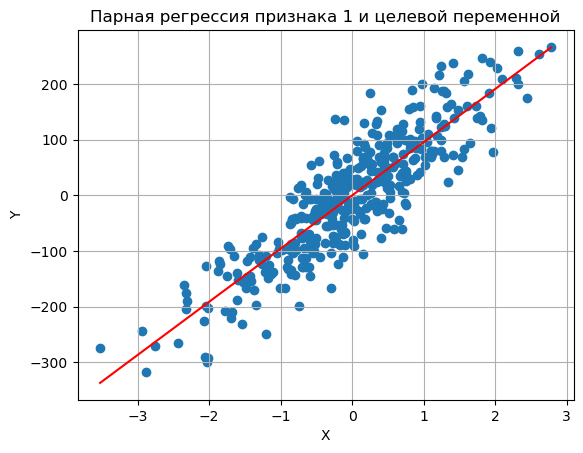

Точность: 0.7699743283650629
Средняя ошибка на кросс-валидации (MSE): 2815.002034236502


In [164]:
methods_stats.append(binary_regression(1))

Коэффициент до обучения [[0]]
Коэффициент после обучения [[46.94897635]]


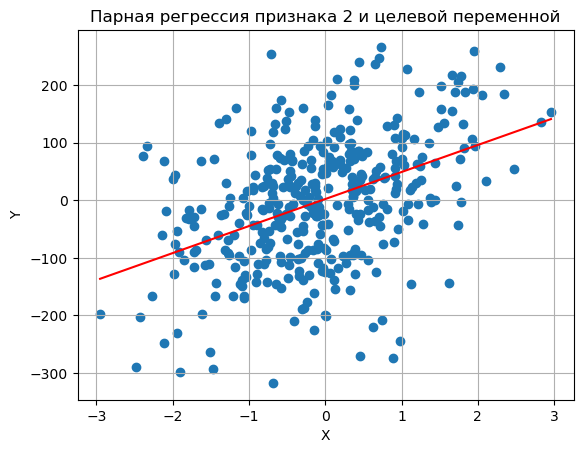

Точность: 0.18794528514998887
Средняя ошибка на кросс-валидации (MSE): 9839.641735363351


In [165]:
methods_stats.append(binary_regression(2))

Коэффициент до обучения [[0]]
Коэффициент после обучения [[23.99882407]]


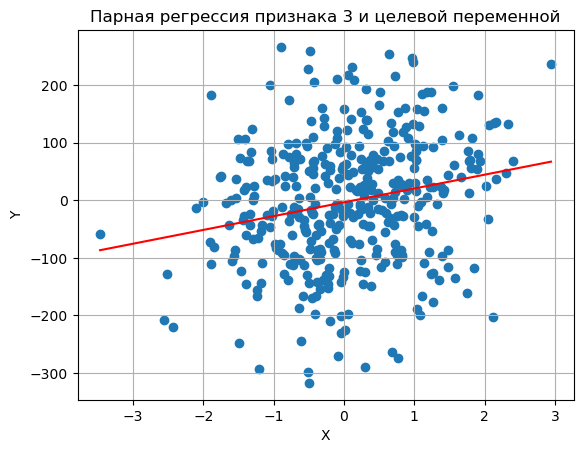

Точность: 0.047470345664983093
Средняя ошибка на кросс-валидации (MSE): 11703.638123359537


In [166]:
methods_stats.append(binary_regression(3))

Коэффициент до обучения [[0]]
Коэффициент после обучения [[1.49082042]]


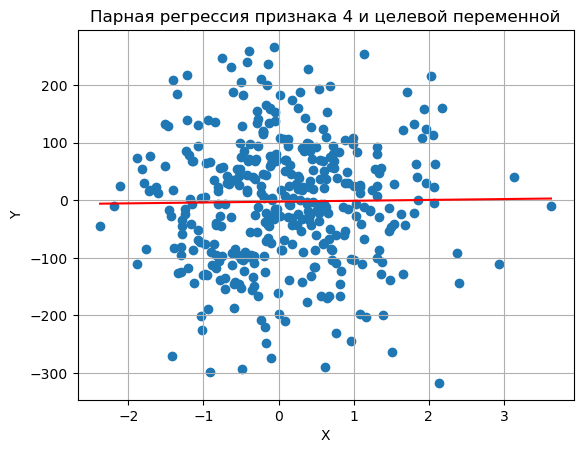

Точность: 0.00017176151145947838
Средняя ошибка на кросс-валидации (MSE): 12134.565653625852


In [167]:
methods_stats.append(binary_regression(4))

До обучения [array([0., 0., 0., 0., 0.])]
После обучения [[15.79537523 93.21521093 37.19410687 31.19129121 -0.23773114]]
Точность 0.9922198026415868
Средняя ошибка на кросс-валидации (MSE): 97.17593635972693


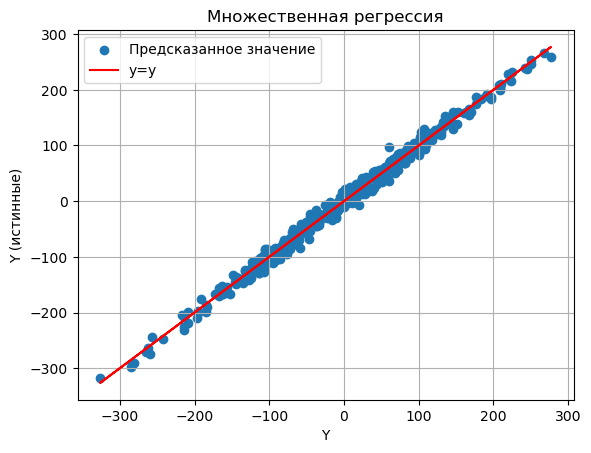

In [168]:
methods_stats.append(multiple_regression())

In [169]:
# 3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго,
# третьего и десятого порядков. Сделайте вывод о значимости регрессии.

def polynomial_regression(X, y, degree):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)  # Создаем полиномиальные признаки

    model = LinearRegression()
    start_time = time.time()
    model.fit(X_poly, y)
    end_time = time.time()
    print(f"После обучения {model.coef_}")
    yy = model.predict(X_poly)
    plt.scatter(yy, y)
    plt.plot(yy, yy, c='r')
    title = f"Полиномиальная регрессия degree {degree}"
    plt.title(title)
    plt.xlabel("Y")
    plt.ylabel("Y (истинные)")
    plt.legend(["Предсказанное значение", "y=y"])
    plt.grid()
    score = model.score(X_poly, y)
    print(f"Score {score}")
    mse_score = (-cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')).mean()
    print("Средняя ошибка на кросс-валидации (MSE):", mse_score)

    return title, score, mse_score, end_time - start_time

После обучения [[ 0.00000000e+00  1.57544880e+01  9.31199624e+01  3.72319834e+01
   3.13264242e+01  4.54339710e-02  1.85468573e-01 -6.41898367e-01
  -5.23737953e-02 -1.48260912e+00 -6.03026787e-03 -4.78174114e-01
  -3.46361626e-02  1.15332837e-01 -4.73321823e-01 -5.79681818e-01
  -3.57019342e-01 -9.51578665e-02 -4.84475083e-02 -3.44304648e-01
  -7.16097818e-01]]
Score 0.9926004162659386


Средняя ошибка на кросс-валидации (MSE): 111.06462576314846


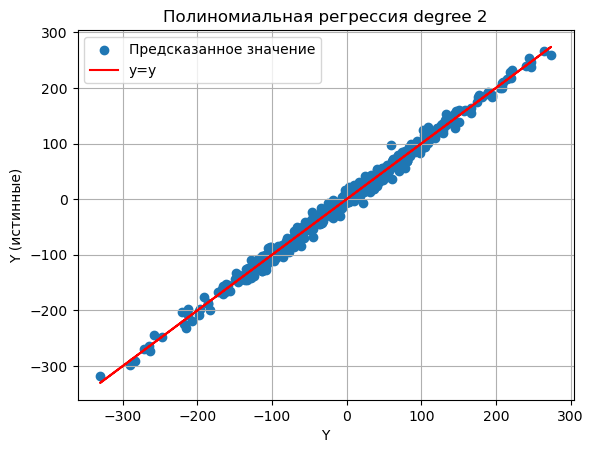

In [170]:
methods_stats.append(polynomial_regression(x, y, 2))

После обучения [[ 7.82247141e-15  1.55966813e+01  9.53341334e+01  3.60534950e+01
   3.13054911e+01  1.46397697e+00  2.05387656e-01 -5.79824170e-01
   2.00220282e-01 -1.51899878e+00  2.53378406e-01 -6.01772658e-01
  -2.53003408e-01  3.50343126e-01  4.34066148e-01 -5.87985331e-01
  -2.29813025e-01 -1.39666773e-01 -3.91156208e-03 -9.45524704e-02
  -2.45400138e-01 -1.43585463e-01 -4.37902947e-01  4.55734531e-01
   2.11308977e-02 -7.84035908e-01 -1.65489249e-01 -2.37410026e-01
  -2.24937571e-01 -5.49638725e-02 -1.17536951e-01 -8.74682770e-01
   9.45141990e-02  5.51682837e-01  2.97655256e-01  3.21555908e-01
  -7.85248111e-02  2.01166546e-01  3.77165057e-01  8.39176659e-01
  -3.80547715e-01  3.27467322e-01 -2.75816117e-01 -8.30820929e-01
  -4.16399206e-01 -2.85143068e-01  4.60183013e-01 -1.93787129e-01
  -5.57857069e-02 -4.53856595e-01  4.94253943e-01  2.62048676e-02
   7.16118268e-02 -7.80149577e-01 -1.14645021e-01 -2.92868866e-01]]
Score 0.9931922368118391
Средняя ошибка на кросс-валидации 

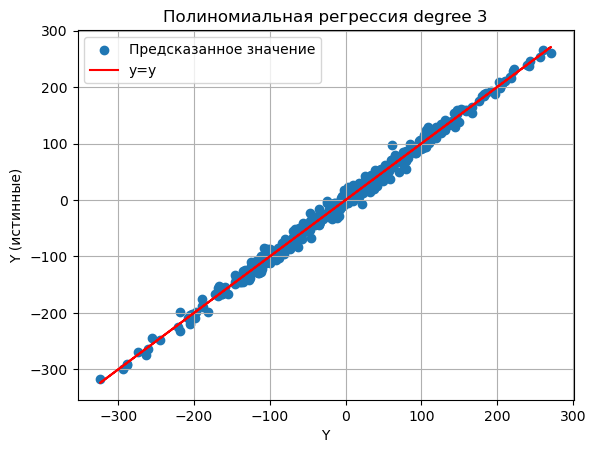

In [171]:
methods_stats.append(polynomial_regression(x, y, 3))

После обучения [[ 7.69727976e-10 -3.70913283e+00  9.84418926e+01 ... -3.52385567e+00
   2.45124685e+00  1.14867749e+00]]
Score 1.0
Средняя ошибка на кросс-валидации (MSE): 283244071.07132167


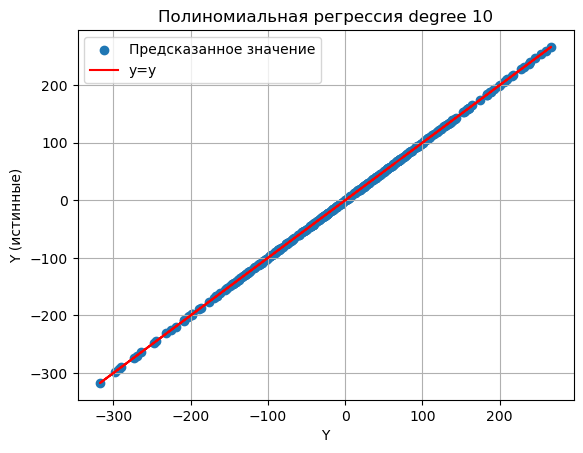

In [172]:
methods_stats.append(polynomial_regression(x, y, 10))

In [ ]:
# 4. Постройте сводную таблицу показателей точности всех построенных моделей.
# Сделайте вывод, какие модели переобученнные, какие - недообученные.

# 5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Модель", "Точность", "MSE при кросс-валидации", "Переобучена", "Время выполнения, сек"]
for method in methods_stats:
    table.add_row([method[0], method[1], method[2], "Нет" if method[2] <= 100000 else "Да", round(method[3], 4)])

# 6. (*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.
print(table)

+--------------------------------------------------+------------------------+-------------------------+-------------+-----------------------+
|                      Модель                      |        Точность        | MSE при кросс-валидации | Переобучена | Время выполнения, сек |
+--------------------------------------------------+------------------------+-------------------------+-------------+-----------------------+
| Парная регрессия признака 0 и целевой переменной |  0.04364336234689348   |    11655.186642974926   |     Нет     |         0.0034        |
| Парная регрессия признака 1 и целевой переменной |   0.7699743283650629   |    2815.002034236502    |     Нет     |         0.0028        |
| Парная регрессия признака 2 и целевой переменной |  0.18794528514998887   |    9839.641735363351    |     Нет     |         0.0024        |
| Парная регрессия признака 3 и целевой переменной |  0.047470345664983093  |    11703.638123359537   |     Нет     |         0.0018        |
| Парн